In [1]:
import cv2
import numpy as np
from collections import namedtuple
from matplotlib import pyplot as plt

In [2]:
ColorThresh = namedtuple('ColorThresh', ['blue', 'green', 'red'])

In [3]:
img = cv2.imread('IMG_3815.JPG')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
def mask_inrange(img, lower, upper):
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")

    # find the colors within the specified boundaries
    mask = cv2.inRange(img, lower, upper)
    
    return mask

In [5]:
def mask_channel_depend(img, thresh):
    tot = img[..., 0] + img[..., 1] + img[..., 2] + np.finfo(float).eps
    blue = img[..., 0] / tot < thresh.blue
    green = img[..., 1] / tot < thresh.green
    red = img[..., 2] / tot > thresh.red
    
    mask = np.logical_and(blue, green, red).astype('uint8')
    
    return mask

In [6]:
# Channel dependency threshold
thresh = ColorThresh(0.25, 0.25, 0.7)

# Inrange threshold
lower = ColorThresh(0, 0, 100)
upper = ColorThresh(25, 25, 150)

In [7]:
mask1 = mask_inrange(img, lower, upper)
mask2 = mask_channel_depend(img, thresh)

masked_img1 = cv2.bitwise_and(img, img, mask = mask1)
masked_img2 = cv2.bitwise_and(img, img, mask = mask2)

masked_img1_rgb = cv2.cvtColor(masked_img1, cv2.COLOR_BGR2RGB)
masked_img2_rgb = cv2.cvtColor(masked_img2, cv2.COLOR_BGR2RGB)

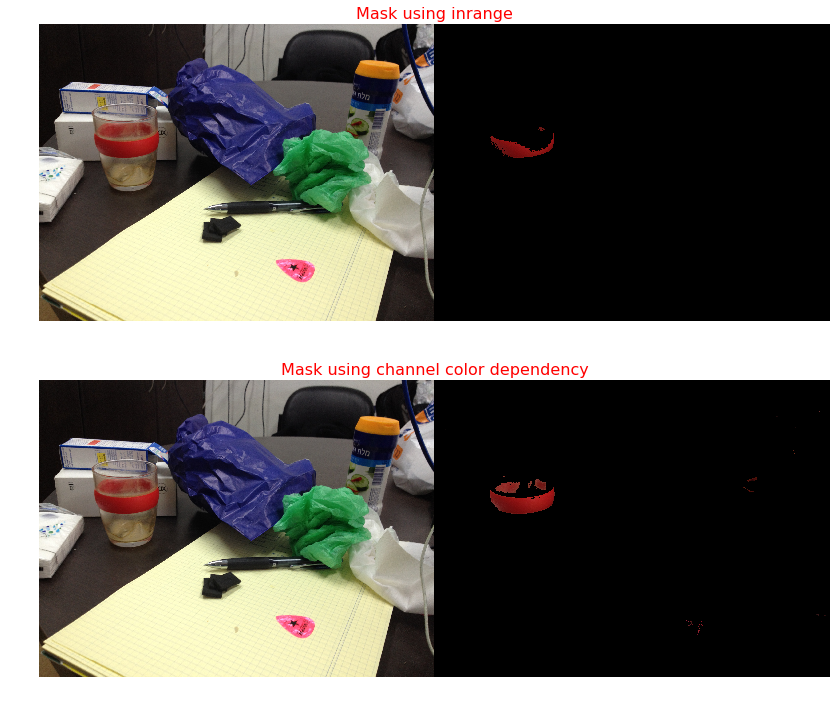

In [28]:
# show the images
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 12))
ax1.set_axis_off()
ax1.set_title('Mask using inrange', fontsize=16, color="red")
ax2.set_axis_off()
ax2.set_title('Mask using channel color dependency', fontsize=16, color="red")
ax1.imshow(np.hstack([img_rgb, masked_img1_rgb]))
ax2.imshow(np.hstack([img_rgb, masked_img2_rgb]))
plt.show()